<a href="https://colab.research.google.com/github/NuTTaoo/NBA_Stat/blob/main/NBA_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 แต้มกับการทำ Rebound

ในการชู๊ต 3 แต้มมี โอกาสไม่ลง กี่ %

ทีมที่สามารถครองบอลได้หลังจากไม่ลงห่วง คือการ รีบาวจะมาดูว่าความเสี่ยงที่ฝ่ายตรงข้ามจะได้บอล เป็น อย่างไร drb
ตำแหน่งที่สามารถ Rebound ได้

การ Rebound เริ่มเก็บสถิติตั้งแต่ปี 1973-74 season in the NBA

3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

[Basketball_Vocab](https://www.basketball-reference.com/about/glossary.html)

# Import Model

In [154]:
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

# Meaning Variance

In [155]:
df_memo = pd.read_csv('https://raw.githubusercontent.com/NuTTaoo/NBA_Stat/main/Data_Set/Memo.csv')
df_memo.info()
df_memo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Column  35 non-null     object
 1   Memo    35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


,Column,Memo
0,seas_id,id
1,season,ปี
2,player_id,ID ผู้เล่น
3,player,ชื่อ ผู้เล่น
4,birth_year,ปีเกิด
5,pos,ตำแหน่งใน Team
6,age,อายุ
7,experience,ประสบการณ์
8,lg,Leage
9,tm,Team


# Data_Prepare

 ## Filter Year & Select_Add Column

In [156]:
df = pd.read_csv('https://raw.githubusercontent.com/NuTTaoo/NBA_Stat/main/Data_Set/Player%20Totals.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31870 entries, 0 to 31869
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       31870 non-null  int64  
 1   season        31870 non-null  int64  
 2   player_id     31870 non-null  int64  
 3   player        31870 non-null  object 
 4   birth_year    2870 non-null   float64
 5   pos           31870 non-null  object 
 6   age           31848 non-null  float64
 7   experience    31870 non-null  int64  
 8   lg            31870 non-null  object 
 9   tm            31870 non-null  object 
 10  g             31870 non-null  int64  
 11  gs            23233 non-null  float64
 12  mp            30787 non-null  float64
 13  fg            31870 non-null  int64  
 14  fga           31870 non-null  int64  
 15  fg_percent    31713 non-null  float64
 16  x3p           25518 non-null  float64
 17  x3pa          25518 non-null  float64
 18  x3p_percent   21342 non-nu

In [157]:
df_3pa_trend = df.loc[ df['season']  > 1979 , ['season','x3pa', 'x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg', 'fga','pts' ] ]
df_groupby_year = df_3pa_trend.groupby(['season'])[['x3pa','x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg','fga','pts']].agg('sum')
df_groupby_year['3pts'] = (df_groupby_year['x3p']*3) #Get 3 Score
df_groupby_year['2pts'] = (df_groupby_year['x2p']*2) #Get 2 Score
df_groupby_year['3pts%'] = ((df_groupby_year['3pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['2pts%'] = ((df_groupby_year['2pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft%'] = ((df_groupby_year['ft'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['x3p_percent'] = ((df_groupby_year['x3p'] / df_groupby_year['x3pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['x2p_percent'] = ((df_groupby_year['x2p'] / df_groupby_year['x2pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft_percent'] = ((df_groupby_year['ft'] / df_groupby_year['fta'])*100).apply(lambda x: round(x,2))
df_groupby_year.style.format("{:,}".format, subset=df_groupby_year.select_dtypes(include=['number']).columns)

,x3pa,x3p,x2pa,x2p,orb,drb,trb,ft,fta,fg,fga,pts,3pts,2pts,3pts%,2pts%,ft%,x3p_percent,x2p_percent,ft_percent
season,,,,,,,,,,,,,,,,,,,,
1980,"5,522.0","1,561.0","176,190","85,753","30,284.0","60,200.0","90,484.0","42,447","55,752","87,314","181,712","218,636","4,683.0","171,506",2.14,78.44,19.41,28.27,48.67,76.14
1981,"4,161.0","1,035.0","172,754","84,581","28,755.0","57,247.0","86,002.0","42,984","57,258","85,616","176,915","215,251","3,105.0","169,162",1.44,78.59,19.97,24.87,48.96,75.07
1982,"4,655.0","1,206.0","175,326","86,996","29,325.0","59,145.0","88,470.0","43,159","57,980","88,202","179,981","220,769","3,618.0","173,992",1.64,78.81,19.55,25.91,49.62,74.44
1983,"4,592.0","1,091.0","179,734","88,038","30,808.0","61,420.0","92,228.0","42,989","58,172","89,129","184,326","222,338","3,273.0","176,076",1.47,79.19,19.33,23.76,48.98,73.9
1984,"4,599.0","1,139.0","165,331","82,391","27,277.0","55,252.0","82,529.0","43,334","57,153","83,530","169,930","211,533","3,417.0","164,782",1.62,77.9,20.49,24.77,49.83,75.82
1985,"6,008.0","1,692.0","165,544","82,499","27,838.0","56,391.0","84,229.0","43,112","56,486","84,191","171,552","213,186","5,076.0","164,998",2.38,77.4,20.22,28.16,49.84,76.32
1986,"6,677.0","1,886.0","166,997","82,492","27,618.0","57,836.0","85,454.0","44,821","59,266","84,378","173,674","215,463","5,658.0","164,984",2.63,76.57,20.8,28.25,49.4,75.63
1987,"9,177.0","2,753.0","165,247","80,896","29,013.0","57,476.0","86,489.0","45,573","59,895","83,649","174,424","215,624","8,259.0","161,792",3.83,75.03,21.14,30.0,48.95,76.09
1988,"10,735.0","3,433.0","172,389","84,316","29,599.0","61,084.0","90,683.0","46,334","60,556","87,749","183,124","225,265","10,299.0","168,632",4.57,74.86,20.57,31.98,48.91,76.51


In [158]:
#df_groupby_year.info()

In [159]:
#df_pair_plot = sns.pairplot(df_groupby_year, height=2.5, aspect=1)

# Analytical


## 3-Point Attempts Trend

In [160]:
x = np.arange(df_groupby_year.index.size) # Use .index to access the index of the DataFrame
fit = np.polyfit(x, df_groupby_year['x3pa'], deg=1)
#print ("Slope : " + str(fit[0]))
#print ("Intercept : " + str(fit[1]))

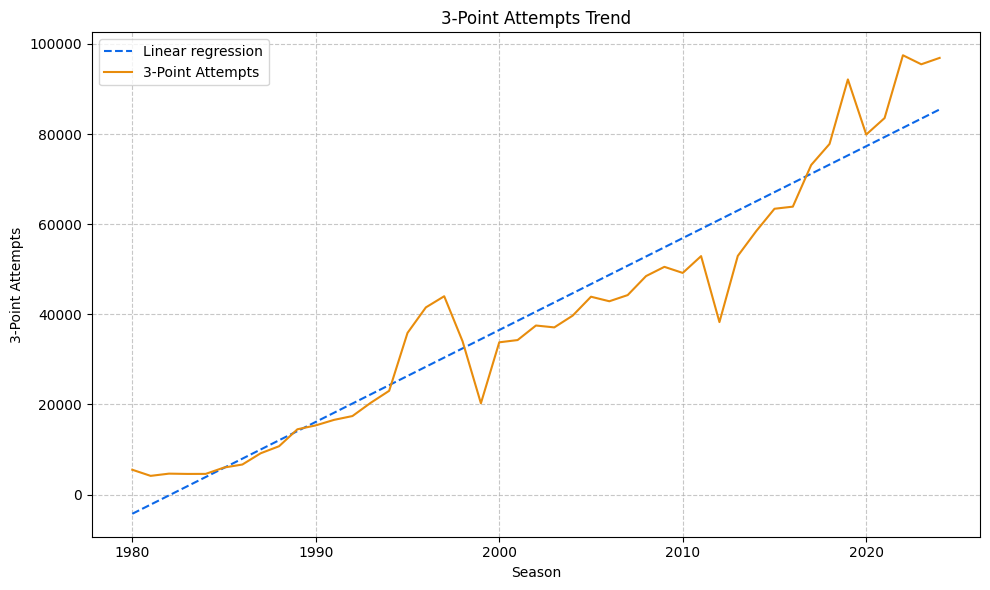

In [161]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6))
#Linear regression plot
plt.plot(df_groupby_year.index, fit_function(x), linestyle='--', label='Linear regression')
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts')
plt.title('3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

จากที่การชู๊ต 3 แต้มมีความสำคัญต่อเกมมากยิ่งขึ้น การได้มาซึ่งคะแนน 3 คะแนน ก็เพิ่มมากขึ้นในทุกๆ ปี (กราฟสีฟ้า)ในขณะที่การทำคะแนนจาก 2 แต้มมีแนวโน้มลดลง (กราฟสีส้ม)

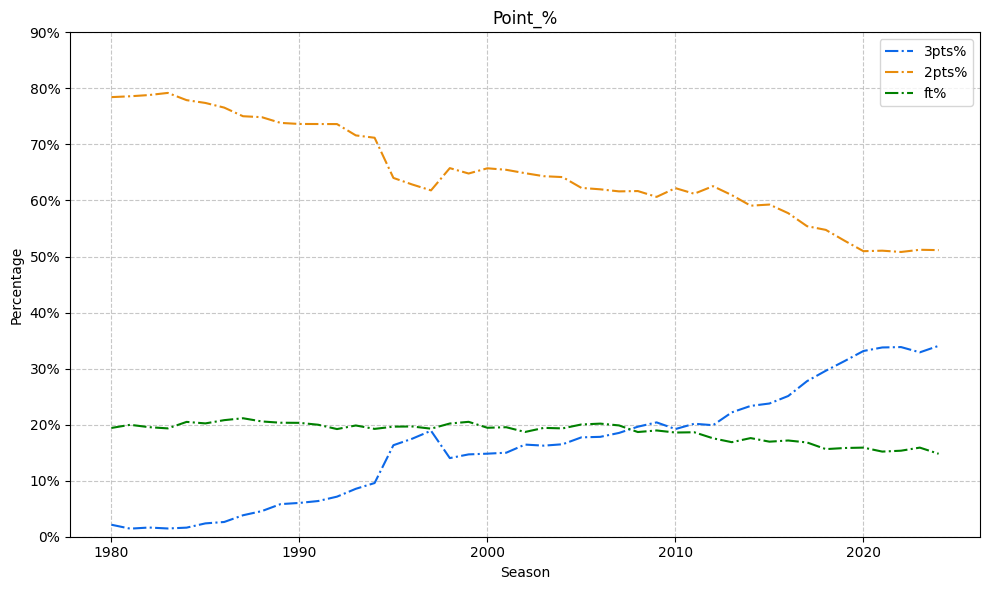

In [182]:
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 90)
plt.plot(df_groupby_year.index, df_groupby_year['3pts%'], label='3pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['2pts%'], label='2pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['ft%'], label='ft%', color='g', linestyle='-.')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Point_%')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

แต่การได้มา 3 แต้ม ไม่ใช่เรื่องง่าย เพราะอัตราการชู้ตลง มีไม่ถึง 40%

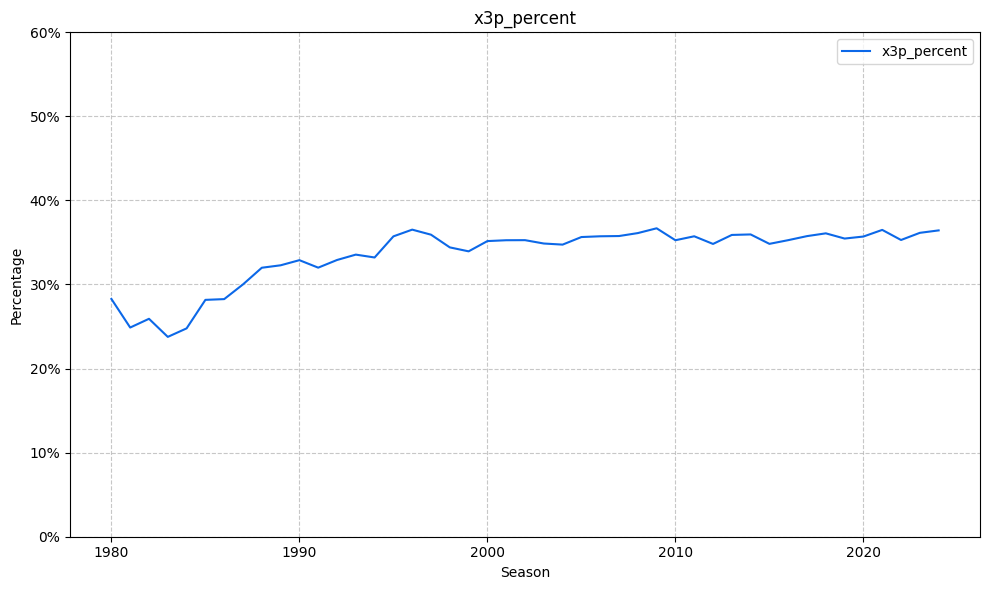

In [163]:
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 60)
plt.plot(df_groupby_year.index, df_groupby_year['x3p_percent'], label='x3p_percent')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('x3p_percent')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Total Rebound & 3-Point Attempts Trend

การชู้ตลูกลง 3 แต้ม น้อยกว่า 40% จะทำให้เกิดการ "Rebound"

Rebound คือการจับลูกหลังการชู้ตลูกพลาด ถือเป็นส่วนสำคัญหนึ่งในเกมเพราะสามารถนำไปสู่การเปลี่ยนมือระหว่างการรุกและรับ โดยแบ่งเป็น

Offensive Rebounds (orb) ทำโดยทีมที่กำลังรุก
Defensive Rebounds (drb) ทำโดยทีมที่กำลังป้องกัน

ถ้าเกิด Offensive Rebounds หมายความว่า ทีมบุกยังสามารถทำแต้ม หรือบุกต่อได้

แต่ถ้า Defensive Rebounds ทีมบุกอาจจะโดนสวนกลับมาจากทีมที่ป้องกัน

Trend จำนวนครั้งที่ชู๊ต 3 แต้มทั้งหมด (กราฟสีน้ำเงิน) กับ การเกิด Rebound (กราฟสีส้ม)

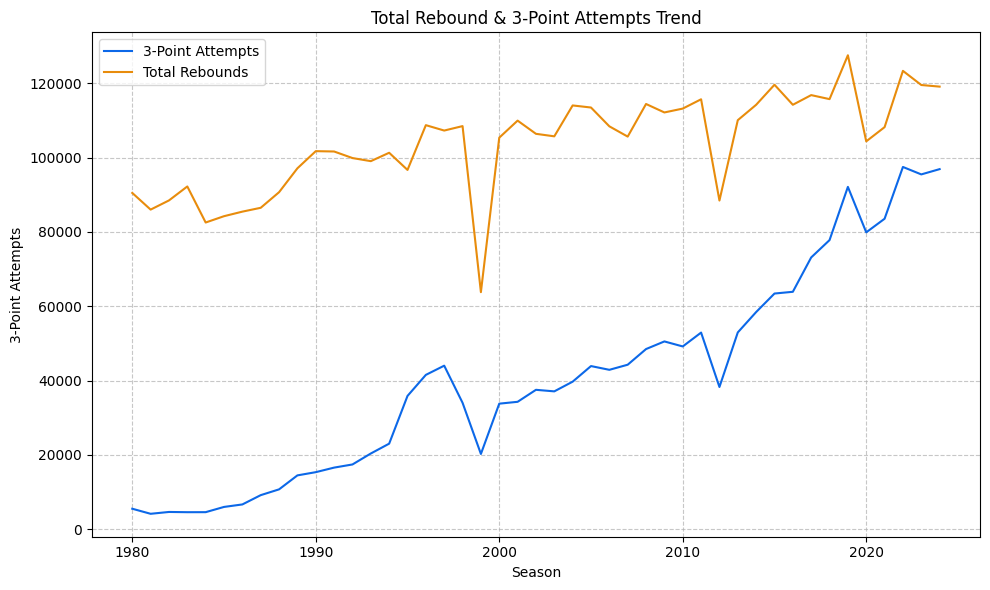

In [164]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6))
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.plot(df_groupby_year.index, df_groupby_year['trb'] , label ='Total Rebounds')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts')
plt.title('Total Rebound & 3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [165]:
df_3pa_trb_trend = df_groupby_year[['x3pa', 'orb', 'drb' , 'trb']]
df_3pa_trb_trend.style.format("{:,}".format, subset=df_3pa_trb_trend.select_dtypes(include=['number']).columns)
df_3pa_trb_trend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1980 to 2024
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3pa    45 non-null     float64
 1   orb     45 non-null     float64
 2   drb     45 non-null     float64
 3   trb     45 non-null     float64
dtypes: float64(4)
memory usage: 2.8 KB


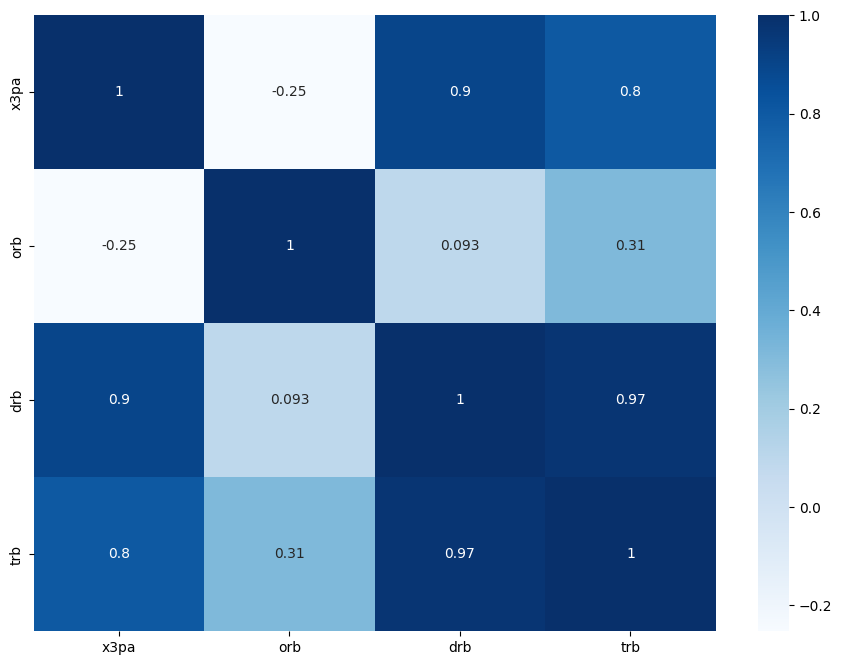

In [166]:
corr = df_3pa_trb_trend.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

จากความสัมพันระหว่างตัวแปร trb และ drb มีความสัมพันธ์เชิง Positive กับ ตัว แปร x3pa (ยิ่งจำนวนการชูู้ต 3 แต้มสูงขึ้น จำนวนครั้งการ Rebound และ การ Rebound โดย Defensive Rebounds จะเพิ่มขึ้น ในทางกลับกัน orb มีความสัมพันธ์เชิง Negative กับ ตัว แปร x3pa

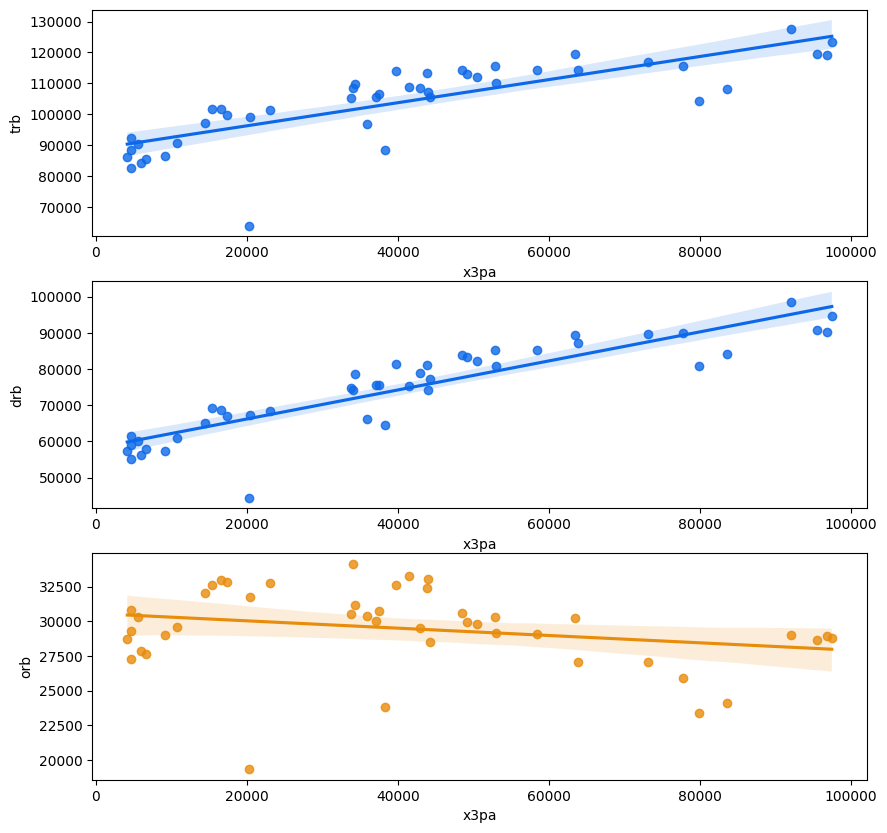

In [167]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

enmax_palette = ["#0c68e8", "#e88c0c"] #Code Hex จาก html color code
sns.set_palette(palette=enmax_palette)

sns.regplot(data=df_groupby_year, x="x3pa", y="trb", ax=axs[0], color="C0") #C0 คือสีแรก
sns.regplot(data=df_groupby_year, x="x3pa", y="drb", ax=axs[1], color="C0")
sns.regplot(data=df_groupby_year, x="x3pa", y="orb", ax=axs[2], color="C1")
plt.show()

## Position and Rebound

In [168]:
df_pos_rb = df.loc[ df['season']  > 1979 , ['season','pos','orb', 'drb' , 'trb']]
print(df_pos_rb['pos'].value_counts().reset_index(name='count'))

         pos  count
0         PF   4929
1         SG   4844
2         PG   4701
3          C   4669
4         SF   4456
5      SF-SG     42
6      PG-SG     37
7      PF-SF     35
8      SG-PG     35
9       C-PF     34
10     SG-SF     33
11      PF-C     32
12     SF-PF     26
13     SG-PF      4
14  SG-PG-SF      1
15      SF-C      1
16     PG-SF      1


In [169]:
df_groupby_pos = df_pos_rb.groupby(['pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['trb'], ascending=False)
df_groupby_pos = df_groupby_pos.iloc[[0,1,2,3,4]]
df_groupby_pos.style.format("{:,}".format, subset=df_groupby_pos.select_dtypes(include=['number']).columns)

,orb,drb,trb
pos,,,
C,"415,966.0","892,320.0","1,308,286.0"
PF,"388,526.0","889,922.0","1,278,448.0"
SF,"237,298.0","608,293.0","845,591.0"
SG,"156,928.0","485,258.0","642,186.0"
PG,"116,012.0","438,947.0","554,959.0"


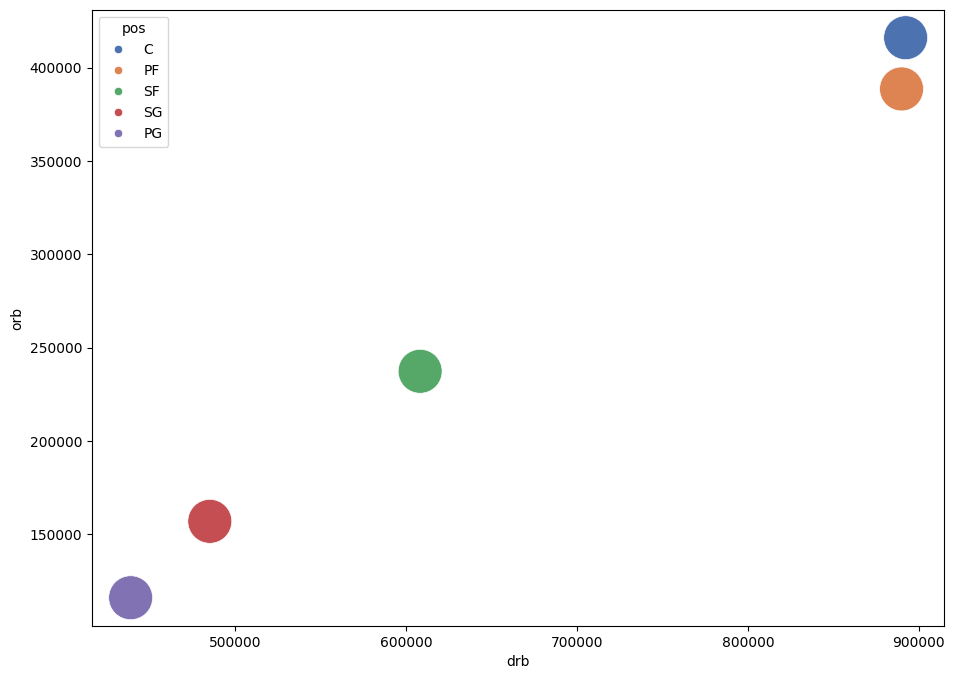

In [170]:
plt.figure(figsize=(11,8))
ax = sns.scatterplot(data=df_groupby_pos, x="drb", y="orb" ,hue='pos', palette="deep")
ax.collections[0].set_sizes([1000])

In [171]:
df_pos_rb = df_pos_rb.loc[ (df_pos_rb['pos'] == 'C') | (df_pos_rb['pos'] == 'PF') | (df_pos_rb['pos'] == 'SF') | (df_pos_rb['pos'] == 'SG') | (df_pos_rb['pos'] == 'PG') , ['season','pos','orb', 'drb' , 'trb']]
df_pos_rb.info()
df_groupby_pos_s = df_pos_rb.groupby(['season','pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['season'], ascending=False)
df_groupby_pos_s

<class 'pandas.core.frame.DataFrame'>
Index: 23599 entries, 0 to 23879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  23599 non-null  int64  
 1   pos     23599 non-null  object 
 2   orb     23599 non-null  float64
 3   drb     23599 non-null  float64
 4   trb     23599 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


orb      drb      trb
season pos                           
2024   SG    3624.0  14207.0  17831.0
       SF    5067.0  17460.0  22527.0
       PG    3015.0  13637.0  16652.0
       PF    6234.0  19582.0  25816.0
       C    10209.0  23075.0  33284.0
...             ...      ...      ...
1980   SF    7312.0  12852.0  20164.0
       PG    2360.0   5264.0   7624.0
       PF    8226.0  16493.0  24719.0
       SG    3776.0   6629.0  10405.0
       C     8456.0  18664.0  27120.0

[225 rows x 3 columns]

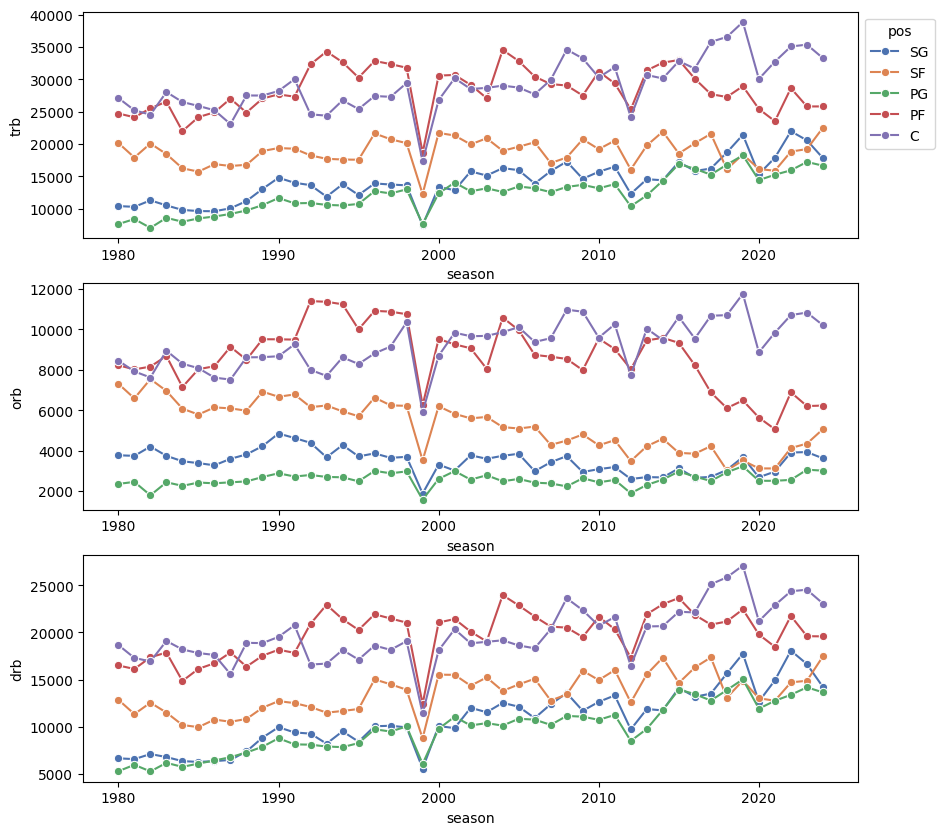

In [172]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

trb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="trb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[0])
orb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="orb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[1] , legend=False)
drb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="drb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[2] , legend=False)

sns.move_legend(trb_plot, "upper left", bbox_to_anchor=(1, 1))